# Loading CBF files

a script for loading and handling CBF files utilzed by the PILATUS detector

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import sys

sys.path.insert(0, '../src/')
from cbf_handling import readcbf
from integrators import*
from utilities import *

### Parameters

In [2]:
sample_name  = 'cubic_01'
run_number   = 13
n_frames = 10
i_frame = 60
pilatus_shape =[619,487]

In [74]:
# beam center (You can estimate this with fit2D or with the ring fitting script)
cx,cy = 335,-430
# angular integration parameters
n_bins = 3500           # number of bins
min_x,max_x = 0,760     #n_bins
mask_thr = 0            # threshold limit for integrator

### Files and folders

In [3]:
data_path = '/Volumes/Seagate Backup Plus Drive/DESY_october2017/raw/%s_%05d/p300/'%(sample_name,run_number)

### Load files

In [32]:
data = np.zeros([n_frames,pilatus_shape[0],pilatus_shape[1]])
for i in range(i_frame,i_frame+n_frames):
    file_name = data_path+'%s_%05d_%05d.cbf'%(sample_name,run_number,i+1)
    content = readcbf(file_name,pilatus_shape[0],pilatus_shape[1])
    data[i-i_frame] = np.fliplr(np.reshape(content,(pilatus_shape[0],pilatus_shape[1])))
avg_data = np.average(data,axis=0)

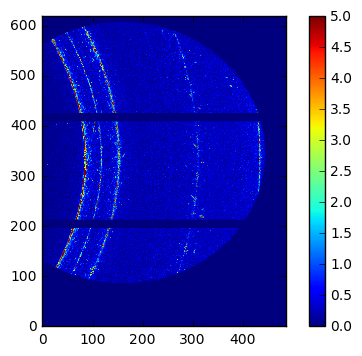

In [33]:
plt.imshow(avg_data,vmax=5,vmin=0,origin='lower left')
plt.colorbar()
plt.show()

### Angular integration

In [76]:
# angular intergation
qbin,Iq = angular_average(avg_data, (cx,cy),None,threshold=0, nx=n_bins,  min_x=min_x, max_x=max_x)

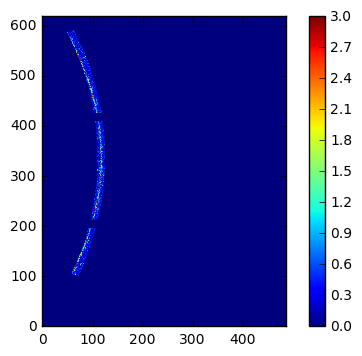

In [75]:
inner_radius,width,spacing,num_rings=540,15,0,1
mask = ring_mask(avg_data,(cx,cy),inner_radius=inner_radius,width=width,spacing=spacing,num_rings=num_rings)
plt.imshow(mask*avg_data,origin='lower left',vmax=3,vmin=0)
plt.colorbar()
plt.show()

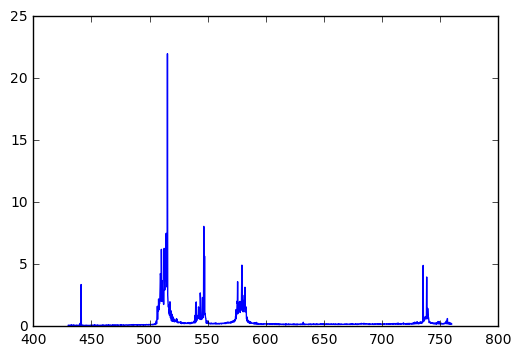

In [77]:
plt.plot(qbin,Iq)
plt.show()